### Topic Proposal
Throughout history, numerous innovations and strategies have been developed to enhance financial stability for corporations. A key factor in sustaining strong growth is the organization of human capital. Today, an increasing number of female leaders are rising to leadership roles in industries historically dominated by men. This proposal aims to investigate whether there is a correlation between workforce composition and a company's ability to grow and maintain stability. We plan to analyze various financial metrics, along with CEO demographics and employee data from Fortune 500 companies, to address the following questions.

### Questions:
- Does more employees mean more robust financial growth?
- Does human resource play an important role in how the companies are ranked?
- Does having female CEOs correlate with more efficiency within corporations?

### Data Pipeline Summary
- We first conduct data scraping from the data source "https://fortune.com/ranking/global500/search/?fortune500_y_n=true" (top 500 companies we would like to conduct our data exploration on). We then leveraged another datasource "https://en.wikipedia.org/wiki/List_of_women_CEOs_of_Fortune_500_companies" to find information on CEOs who are female to help answer our aforementioned questions.
Please refer to the blocks code below to see how we scrape these data.
- We then identify the numerical features such as Revenues, Profits, Assets and number of Employees, as well categorical features such as CEO gender information and ranking.
- Once all the data is scraped, we removed unnecessary columns, refine the data types for numerical data (raw data was in mixed types) to help conduct further calculations as well as graphing purposes.
- To determine the companies' resource utilisation efficiency, we used Asset Turonver Ratio, calculated Revenue/Total Assets, to help draw conclusions on the aforementioned questions.
- Gather up all the columns we need into a consolidated data file.
- We then visualised the data to check if our proposal is coherent.

In [1]:
"""

Links:
https://fortune.com/ranking/global500/search/?fortune500_y_n=true

Numerical Features:
'Rank', 'Name', 'Revenues ($M)', 'Revenue Percent Change',
'Profits ($M)', 'Profits Percent Change', 'Assets ($M)', 'Employees',
'Change in Rank', 'Years on Global 500 List'

Categorical Features:
Fortune Global 500 (Top 10 Specifically)
Female CEO

How the data will be used:
The data from the Fortune Global 500 will be used to answer two critically important questions. First, which factors influence a company's
profitability relative to revenue and second how the number of employyes correlate with revenue and profits. By analyzing the key statistics
of companies such as their revenue, profits, assets, number of employees, etc. we will be able to compare these values and see where the pattern 
lies between the most successful companies and companies that may not be most successful. Predictive modeling can be used to forecast a
company's future performance based on these statistics. 
"""
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

url = "https://fortune.com/ranking/global500/search/"
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html')

headers = [th.get_text(strip=True) for th in soup.find_all('th')]
cleaned_headers = [header.replace('Remove', '') for header in headers]

df = pd.DataFrame(columns = cleaned_headers)

column_data = soup.find_all('td')

data = []
for td in column_data:
    if not td.find('a'):
        data.append(td.get_text(strip=True))

num_columns = len(cleaned_headers)

rows = [data[i:i + num_columns] for i in range(0, len(data), num_columns)]

for row in rows:
    df.loc[len(df)] = row
        
df

#df.to_csv("Fortune 500 webscraping data.csv")
#Column for Female CEO 
#Save data to csv file 

,Rank,Name,Revenues ($M),Revenue Percent Change,Profits ($M),Profits Percent Change,Assets ($M),Employees,Change in Rank,Years on Global 500 List
0,1,Walmart,"$648,125",6%,"$15,511",32.8%,"$252,399","2,100,000",-,30
1,2,Amazon,"$574,785",11.8%,"$30,425",-,"$527,854","1,525,000",2,16
2,3,State Grid,"$545,947.5",3%,"$9,204.3",12.4%,"$781,126.2","1,361,423",-,24
3,4,Saudi Aramco,"$494,890.1",-18%,"$120,699.3",-24.1%,"$660,819.2","73,311",-2,6
4,5,Sinopec Group,"$429,699.7",-8.8%,"$9,393.4",-2.7%,"$382,688","513,434",1,26
...,...,...,...,...,...,...,...,...,...,...
495,496,Air France-KLM Group,"$32,452.3",16.9%,"$1,009.7",31.9%,"$38,093.7","76,271",-,25
496,497,Enbridge,"$32,349.5",-21%,"$4,588.3",98.8%,"$136,769.6","12,450",-132,11
497,498,ABB,"$32,235",9.5%,"$3,745",51.3%,"$40,940","107,900",-,29
498,499,Mitsubishi Heavy Industries,"$32,223.2",3.8%,"$1,536.2",59.4%,"$41,371.9","77,697",-,30


In [2]:
# scrape companies with female ceos

# URL for the Wikipedia page
url = "https://en.wikipedia.org/wiki/List_of_women_CEOs_of_Fortune_500_companies"

# Send GET request to the page
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')

# Find the table
table = soup.find('table', {'class': 'wikitable'})

# Extract headers
headers = [header.text.strip() for header in table.find_all('th')]

# Extract rows
rows = []
for row in table.find_all('tr')[1:]:  # Skip the header row
    cols = [col.text.strip() for col in row.find_all('td')]
    rows.append(cols)

# Create DataFrame
df_female = pd.DataFrame(rows, columns=headers)

df_female


,CEO,Company,Fortune 500 rank,Start date
0,Karen S. Lynch,CVS Health,6,"February 1, 2021"
1,Mary T. Barra,General Motors,19,"January 1, 2014"
2,Gail K. Boudreaux,Elevance Health,20,"November 1, 2017"
3,Jane Fraser,Citigroup,21,"February 1, 2021"
4,Sarah London,Centene,22,"March 1, 2022"
5,Priscilla Almodovar,Fannie Mae,27,"December 1, 2022"
6,Carol B. Tomé,United Parcel Service,45,"June 1, 2020"
7,Susan Patricia Griffith,Progressive,62,"July 1, 2016"
8,Safra A. Catz,Oracle,89,"September 1, 2014"
9,Thasunda Brown Duckett,Tiaa,96,"May 1, 2021"


In [3]:
# Function to check if Name is in df_Female

def nameCheck(Name):
    if Name in df_female['Company'].values:
        return True
    else:
        return False

In [4]:
df['Female CEO'] = df['Name'].apply(nameCheck)

df

df.to_csv("With female CEO data-Fortune 500 webscraping data.csv")

### Data Exploration and Curation
We would like to determine how personel structure affects a company's ability financial health. The dataset will be conducted on the Global Fortune 500 Companies.

- Does employees and revenue growth have positive correlation (does higher number of employees translate to higher growth in revenue) or with the help of technologies, this element is no longer in deciding factor?
- Do companies with female CEO have a better strategies, therefore, lead to stronger growth compared to their peers?

In [5]:
df.columns

Index(['Rank', 'Name', 'Revenues ($M)', 'Revenue Percent Change',
       'Profits ($M)', 'Profits Percent Change', 'Assets ($M)', 'Employees',
       'Change in Rank', 'Years on Global 500 List', 'Female CEO'],
      dtype='object')

In [6]:
# curate the data
# change the datatype of the employees from strings to float
df['Employees'] = df['Employees'].str.replace(',', '', regex=False)
df['Employees'] = df['Employees'].astype(float)

# clean up the revenues metrics
df['Revenues ($M)'] = df['Revenues ($M)'].str.replace('$','', regex=False)
df['Revenues ($M)'] = df['Revenues ($M)'].str.replace(',','', regex=False)
df['Revenues ($M)'] = df['Revenues ($M)'].astype(float)

# clean up the profits metrics
df['Profits ($M)'] = df['Profits ($M)'].str.replace('$','', regex=False)
df['Profits ($M)'] = df['Profits ($M)'].str.replace(',','', regex=False)
df['Profits ($M)'] = df['Profits ($M)'].astype(float)

# clean up te assets metrics
df['Assets ($M)'] = df['Assets ($M)'].str.replace('$','', regex=False)
df['Assets ($M)'] = df['Assets ($M)'].str.replace(',','', regex=False)
df['Assets ($M)'] = df['Assets ($M)'].astype(float)

# clean up the rank metrics
df['Rank'] = df['Rank'].astype(int)

# drop the unnecessary columns
df.drop(['Revenue Percent Change', 'Profits Percent Change', 'Change in Rank'], axis=1, inplace=True)

# add asset turnover ratio
# this metric measures how efficiently a company is working
df['Asset Turnover Ratio'] = df['Revenues ($M)']/df['Assets ($M)']

# moving Asset Turnover Ratio to nearer another financials metrics
fifth_column = df.pop('Asset Turnover Ratio')
df.insert(5, 'Asset Turnover Ratio', fifth_column)

# sort the change in revenue to decreasing
#new_df = df.sort_values(by=['Employees'], ascending=False)
df.head()

,Rank,Name,Revenues ($M),Profits ($M),Assets ($M),Asset Turnover Ratio,Employees,Years on Global 500 List,Female CEO
0,1,Walmart,648125.0,15511.0,252399.0,2.567859,2100000.0,30,False
1,2,Amazon,574785.0,30425.0,527854.0,1.088909,1525000.0,16,False
2,3,State Grid,545947.5,9204.3,781126.2,0.698924,1361423.0,24,False
3,4,Saudi Aramco,494890.1,120699.3,660819.2,0.748904,73311.0,6,False
4,5,Sinopec Group,429699.7,9393.4,382688.0,1.122846,513434.0,26,False


In [7]:
# cleaning the female CEOs data
df_female['Fortune 500 rank'] = df_female['Fortune 500 rank'].astype(int)
df_female.head()

,CEO,Company,Fortune 500 rank,Start date
0,Karen S. Lynch,CVS Health,6,"February 1, 2021"
1,Mary T. Barra,General Motors,19,"January 1, 2014"
2,Gail K. Boudreaux,Elevance Health,20,"November 1, 2017"
3,Jane Fraser,Citigroup,21,"February 1, 2021"
4,Sarah London,Centene,22,"March 1, 2022"


In [8]:
# Getting average ranking of each dataset
mean_all = df['Rank'].mean()
mean_female_ceo = df_female['Fortune 500 rank'].mean()

In [9]:
# importing plotting modules
import seaborn as sns 
import matplotlib as plt
import plotly.graph_objects as go
import plotly.express as px




In [10]:
# plotting the number of employees vs Revenue
fig = px.scatter(df, x='Employees', y='Revenues ($M)', color='Name', title='Revenues vs Number of Employees among companies')
fig.show()

In [11]:
# plotting the number of employees vs Rank
fig = px.scatter(df, x='Rank', y='Employees', color='Name', title='Ranking vs Number of Employees among companies')
fig.show()

In [12]:
# Finding the average asset turnover ratio between companies run by female CEOs
# non-female CEOs

female_df = df[df['Female CEO'] == True]
atr_female = female_df['Asset Turnover Ratio'].mean()

non_female_ceo = df[df['Female CEO'] == False]
atr_non_female = non_female_ceo['Asset Turnover Ratio'].mean()



# Data for the bar graph
data = {
    'CEO Type': ['Female CEO', 'Non-Female CEO'],
    'Average Asset Turnover Ratio': [atr_female, atr_non_female]
}

# Create a DataFrame
bar_df = pd.DataFrame(data)

# Create the bar graph using Plotly Express
fig = px.bar(bar_df, 
             x='CEO Type', 
             y='Average Asset Turnover Ratio', 
             title='Average Asset Turnover Ratio by CEO Gender',
             color ='CEO Type',
             labels={'Average Asset Turnover Ratio': 'Avg ATR', 'CEO Type': 'CEO Type'})

# Show the figure
fig.show()




## Random Forest Classification Model
We want to investigate that: Do companies with female CEO have better strategies, therefore, lead to stronger growth?

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [14]:
def statistical_analysis(df):
    # First metrics we use to compare performance: Revenue per Employee
    # Second metrics: Assets turnover ratio
    df['Revenue_per_Employee'] = df['Revenues ($M)'] / df['Employees']
    
    # Group by CEO gender
    female_ceo = df[df['Female CEO'] == True]
    male_ceo = df[df['Female CEO'] == False]
    
    metrics = ['Asset Turnover Ratio', 'Revenue_per_Employee']
    stats_results = {}
    
    for metric in metrics:
        stats_df = pd.DataFrame({
            'Female CEO': [
                female_ceo[metric].mean(),
                female_ceo[metric].median(),
                female_ceo[metric].std()
            ],
            'Male CEO': [
                male_ceo[metric].mean(),
                male_ceo[metric].median(),
                male_ceo[metric].std()
            ]
        }, index=['Mean', 'Median', 'Std'])
        
        # Perform t-test
        t_stat, p_value = stats.ttest_ind(female_ceo[metric], male_ceo[metric])
        stats_results[metric] = {
            'statistics': stats_df,
            't_statistic': t_stat,
            'p_value': p_value
        }
    
    return stats_results

In [15]:
def classification_analysis(df):
    # Create performance score
    df['AT_normalized'] = (df['Asset Turnover Ratio'] - df['Asset Turnover Ratio'].min()) / \
                         (df['Asset Turnover Ratio'].max() - df['Asset Turnover Ratio'].min())
    
    df['RevEmp_normalized'] = (df['Revenue_per_Employee'] - df['Revenue_per_Employee'].min()) / \
                             (df['Revenue_per_Employee'].max() - df['Revenue_per_Employee'].min())
    
    # Calculate performance score
    df['Performance_Score'] = (df['AT_normalized'] + df['RevEmp_normalized']) / 2
    
    # Create binary classification target (top 25% are high performers)
    df['High_Performance'] = (df['Performance_Score'] > df['Performance_Score'].quantile(0.75)).astype(int)
    
    # Features for both models
    features_with_gender = [
        'Female CEO',
        'Employees',
        'Years on Global 500 List',
        'Profits ($M)',
        'Assets ($M)'
    ]
    
    features_without_gender = features_with_gender[1:]  # Exclude Female CEO
    
    # Prepare data
    X_with_gender = df[features_with_gender].copy()
    X_without_gender = df[features_without_gender].copy()
    y = df['High_Performance']
    
    X_with_gender['Female CEO'] = X_with_gender['Female CEO'].astype(int)
    
    # Split data
    X_with_train, X_with_test, y_train, y_test = train_test_split(X_with_gender, y, test_size=0.2, random_state=42)
    X_without_train = X_with_train[features_without_gender]
    X_without_test = X_with_test[features_without_gender]
    
    # Scale features
    scaler_with = StandardScaler()
    scaler_without = StandardScaler()
    
    X_with_train_scaled = scaler_with.fit_transform(X_with_train)
    X_with_test_scaled = scaler_with.transform(X_with_test)
    
    X_without_train_scaled = scaler_without.fit_transform(X_without_train)
    X_without_test_scaled = scaler_without.transform(X_without_test)
    
    # Train models
    rf_with_gender = RandomForestClassifier(random_state=42)
    rf_without_gender = RandomForestClassifier(random_state=42)
    
    rf_with_gender.fit(X_with_train_scaled, y_train)
    rf_without_gender.fit(X_without_train_scaled, y_train)
    
    # Make predictions
    y_pred_with = rf_with_gender.predict(X_with_test_scaled)
    y_pred_without = rf_without_gender.predict(X_without_test_scaled)
    
    # Calculate feature importance for both models
    importance_with = pd.DataFrame({
        'feature': features_with_gender,
        'importance': rf_with_gender.feature_importances_
    }).sort_values('importance', ascending=False)
    
    importance_without = pd.DataFrame({
        'feature': features_without_gender,
        'importance': rf_without_gender.feature_importances_
    }).sort_values('importance', ascending=False)
    
    return {
        'model_with_gender': {
            'report': classification_report(y_test, y_pred_with),
            'importance': importance_with
        },
        'model_without_gender': {
            'report': classification_report(y_test, y_pred_without),
            'importance': importance_without
        }
    }

Part 1: Statistics

Asset Turnover Ratio Statistics:
        Female CEO  Male CEO
Mean      1.065867  0.900365
Median    0.954256  0.675326
Std       0.812423  1.012099
T-statistic: 0.5618
P-value: 0.5745

Revenue_per_Employee Statistics:
        Female CEO   Male CEO
Mean      2.225813   1.814609
Median    0.585158   0.684692
Std       4.831689  11.055372
T-statistic: 0.1284
P-value: 0.8978

Part 2: ML Classification

Model With CEO Gender:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        77
           1       0.68      0.57      0.62        23

    accuracy                           0.84       100
   macro avg       0.78      0.74      0.76       100
weighted avg       0.83      0.84      0.83       100


Feature Importance (With Gender):
                    feature  importance
4               Assets ($M)    0.591773
1                 Employees    0.155721
3              Profits ($M)    0.154202
2  Years on Global 500 List    0

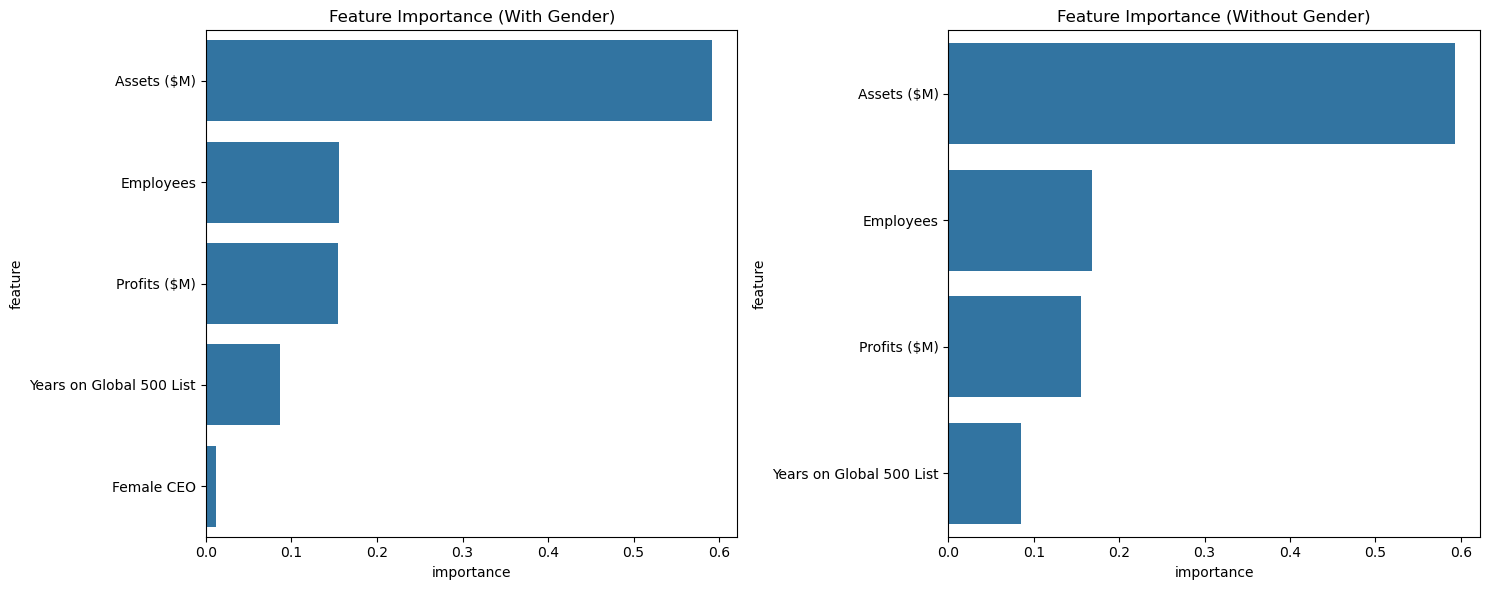

In [16]:
# Run analysis and plots
def run_analysis(df):
    print("Part 1: Statistics")
    stats_results = statistical_analysis(df)
    for metric, results in stats_results.items():
        print(f"\n{metric} Statistics:")
        print(results['statistics'])
        print(f"T-statistic: {results['t_statistic']:.4f}")
        print(f"P-value: {results['p_value']:.4f}")
    
    # Run classification analysis
    print("\nPart 2: ML Classification")
    class_results = classification_analysis(df)
    
    print("\nModel With CEO Gender:")
    print(class_results['model_with_gender']['report'])
    print("\nFeature Importance (With Gender):")
    print(class_results['model_with_gender']['importance'])
    
    print("\nModel Without CEO Gender:")
    print(class_results['model_without_gender']['report'])
    print("\nFeature Importance (Without Gender):")
    print(class_results['model_without_gender']['importance'])
    
    # Visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot feature importance for both models
    sns.barplot(data=class_results['model_with_gender']['importance'], 
                x='importance', y='feature', ax=ax1)
    ax1.set_title('Feature Importance (With Gender)')
    
    sns.barplot(data=class_results['model_without_gender']['importance'], 
                x='importance', y='feature', ax=ax2)
    ax2.set_title('Feature Importance (Without Gender)')
    
    plt.tight_layout()
    plt.show()
    
    return stats_results, class_results

results = run_analysis(df)

### Evaluation and Discussion 
- We choose Asset Turnover Ratio and Revenue per Employee as performance metris to evalaute company performance. And we firstly conducted direct statistical comparisons of our key performance metrics such as t-tests.
- Then, we implemented Random Forest classification model on our dataset. We created two models - one with CEO gender as a feature and one without. This dual-model approach provided stronger evidence than a single model could, as it allowed us to observe that what removing the gender feature actually affect. 
- Our models provide more information into performance prediction. The first model with CEO gender feature achieved an overall accuracy of 84% for higher performance companies with  a showing precision of 0.68, recall of 0.57 and an F1-score of 0.62. At the same time, the Random Forest Classification model excluding CEO gender demonstrated slightly better performance, achieving 87% accuracy with metrics precision of 0.78, recall of 0.61, and F1-score of 0.68.
- These findings suggest that while female-led companies show a slightly better average performance, the difference is not statistically significant, and company performance is primarily driven by other factors such as assets, employee count and profits. The fact that removing the CEO gender metrics actually improved model performance draws a conclusion that the CEO gender has very limited contribution to company performance. 
-  This result, however, doesn't necessarily indicate a failure of our model or hypothesis. Instead it may reveal underlying issues such as the small sample size of female CEOs in Fortune 500 companies, the stronger influence of structural factors on performance compared to individual leadership, or the limitations of our metrics in capturing leadership qualities. This conclusion reveals both positive and negative views about gender-based leadership effectiveness, suggesting that success in corporate leadership goes beyond gender boundaries.